# 9/14 Predicting the opening/closing of hospitals

## Objective:
The objective of this project is to predict wheather the hospital should be given financial aid or not based on their **FICO** scores. On the other hand, a Korean Fintech company MOUDA tries to provide financial opportunity to hospital owners who do not have high FICO scores nor collateral, by forecasting their future sales during the loan period. 

## Data Collection:

URL : [File directory](https://drive.google.com/file/d/1yJ6WKOxj-nMXHzA_ncg9VQzSk5hs8eZ4/view)

### Source:

> The whole notebook was done written for hackathon and their website is [dacon](https://dacon.io/cpt2)



## Workflow :

   1. **Exploratory Data Analysis**
       - 1.1 Data preprocessing.
       - 1.2 Visual analysis of the correlation between the factors.
       - 1.3 Correlation Matrix    
       
   1. **Model Development and Classification**
        - 2.1 Data Preparation
        - 2.2 Model Development
            - 2.2.1 DecisionTree Classifier
            - 2.2.2 KNN
            - 2.2.3 Naïve Bayes
            - 2.2.4 Decision Trees
            - 2.2.5 Random Forest
   

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')

In [17]:
df=pd.read_csv('train.csv')

In [18]:
df.shape

(301, 58)

In [19]:
df_complete=df

In [20]:
df_complete.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


### 1.1 Data preprocessing

In [21]:
df_complete[df_complete['ownerChange'].isna()]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
48,74,open,seoul,1,19940425,28.0,traditional_hospital,8.872427e+09,9.641249e+08,7.638920e+09,...,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,NaN,NaN,NaN
60,94,open,gangwon,128,20031201,244.0,nursing_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,96,open,busan,64,20170602,128.0,nursing_hospital,5.236406e+08,2.306773e+07,8.355775e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,38.0,NaN,NaN
93,140,close,gyeongbuk,114,20070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,...,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN
206,298,open,gyeongnam,32,20170120,160.0,nursing_hospital,3.279139e+09,3.726966e+08,3.507972e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NaN,103.0,NaN
212,306,close,jeonnam,33,19990603,66.0,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,...,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,NaN,NaN,NaN
242,345,open,busan,69,20170420,0.0,traditional_clinic,6.845503e+08,0.000000e+00,5.619356e+08,...,6.957960e+07,6.920960e+07,0.000000e+00,3.700000e+05,0.000000e+00,1.900197e+09,0.0,NaN,NaN,NaN
258,363,open,gyeongbuk,95,20141219,0.0,clinic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,369,open,gangwon,100,20020123,39.0,hospital,3.007769e+09,1.197756e+09,2.258240e+09,...,1.883430e+09,5.315201e+08,2.000000e+08,1.351910e+09,1.201910e+09,1.017573e+09,226197450.0,NaN,NaN,NaN
285,407,open,gyeongbuk,160,19881104,119.0,hospital,9.618709e+09,0.000000e+00,9.751211e+09,...,4.416916e+09,1.524426e+09,0.000000e+00,2.892490e+09,5.462400e+08,4.902827e+09,0.0,NaN,NaN,NaN


In [22]:
df_complete['ownerChange']=df_complete['ownerChange'].fillna('?')
df_complete['instkind']=df_complete['instkind'].fillna('?')

In [23]:
le = LabelEncoder()
df_complete['sido_f'] = le.fit_transform(df_complete['sido'])
df_complete['OC_f'] = le.fit_transform(df_complete['OC'])
df_complete['ownerChange_f'] = le.fit_transform(df_complete['ownerChange'])
df_complete['instkind_f'] = le.fit_transform(df_complete['instkind'])

In [24]:
df_complete.columns

Index(['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind',
       'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2',
       'employee1', 'employee2', 'ownerChange', 'sido_f', 'OC_f',
       'ownerChange_f', 'instkind_f'],
      dtype='object')

### 1.2 Visual analysis of the correlation between the Factors

In [25]:
corr = df_complete[['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind','revenue1', 'salescost1', 'sga1',
                    'salary1', 'noi1', 'noe1','interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1','receivableS1',
                    'inventoryAsset1', 'nonCAsset1', 'tanAsset1','OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
                    'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1','revenue2', 'salescost2', 'sga2', 
                    'salary2', 'noi2', 'noe2','interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2','receivableS2',
                    'inventoryAsset2', 'nonCAsset2', 'tanAsset2','OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
                    'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2','employee1', 'employee2','ownerChange',
                    'sido_f', 'OC_f','ownerChange_f', 'instkind_f']].corr()

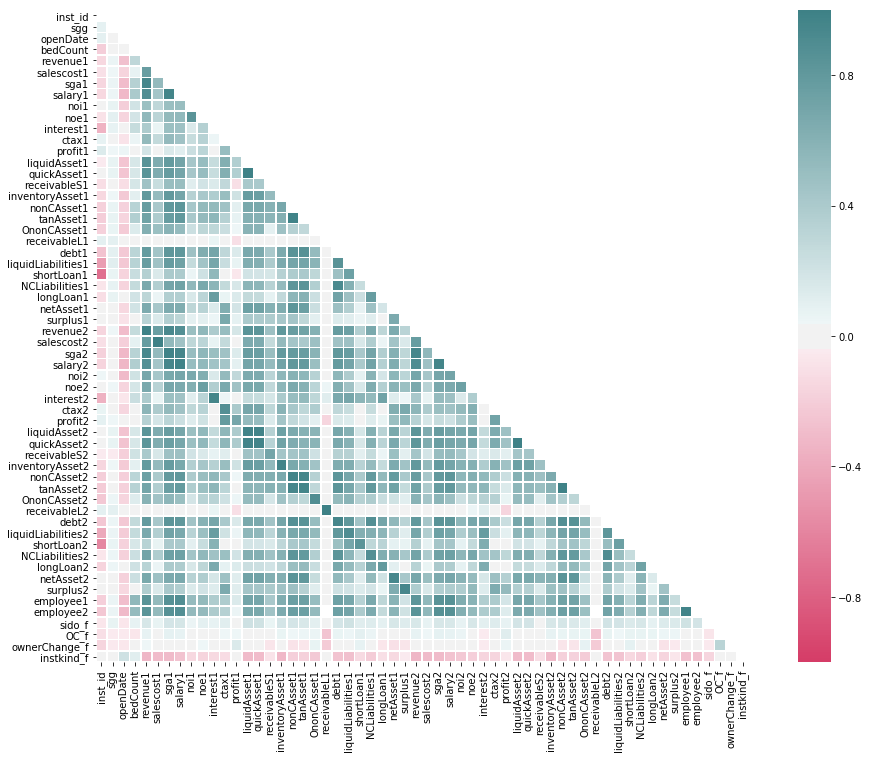

In [30]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18,12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(1,200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1}, annot  = False)


### 1.3 Correlation matrix

In [31]:
display(df_complete.corr())

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,sido_f,OC_f,ownerChange_f,instkind_f
inst_id,1.000000,0.089119,0.100530,-0.201146,-0.144171,-0.094628,-0.153702,-0.146365,0.023597,-0.090138,...,-0.064499,-0.167915,-0.014878,-0.010590,-0.188398,-0.237603,-0.070020,-0.106863,-0.161885,0.002997
sgg,0.089119,1.000000,0.026059,0.021090,0.060943,0.041460,0.055987,0.049483,0.073464,0.095966,...,0.046929,0.054543,0.017320,-0.024172,0.056274,0.055870,0.070794,-0.043927,-0.050619,0.007746
openDate,0.100530,0.026059,1.000000,0.019251,-0.273546,-0.168242,-0.291757,-0.313554,-0.200698,-0.156695,...,-0.186889,-0.029863,-0.180319,-0.142105,-0.283446,-0.310881,-0.067997,-0.049455,-0.059287,0.218740
bedCount,-0.201146,0.021090,0.019251,1.000000,0.289082,0.078792,0.349943,0.404217,0.201880,0.193827,...,0.233065,0.215910,0.229840,0.002476,0.549031,0.519291,0.084167,-0.064115,0.017341,0.111050
revenue1,-0.144171,0.060943,-0.273546,0.289082,1.000000,0.763828,0.948704,0.887745,0.488480,0.547292,...,0.707237,0.335618,0.673484,0.379391,0.848154,0.840224,0.168738,0.081702,0.043386,-0.333050
salescost1,-0.094628,0.041460,-0.168242,0.078792,0.763828,1.000000,0.529645,0.442412,0.293315,0.313329,...,0.377095,0.059127,0.468871,0.150657,0.535739,0.532871,0.071623,0.032493,0.019529,-0.296707
sga1,-0.153702,0.055987,-0.291757,0.349943,0.948704,0.529645,1.000000,0.965193,0.493348,0.537183,...,0.740522,0.404109,0.660272,0.415082,0.864533,0.862690,0.187394,0.090555,0.037188,-0.298834
salary1,-0.146365,0.049483,-0.313554,0.404217,0.887745,0.442412,0.965193,1.000000,0.507201,0.539640,...,0.741377,0.387288,0.668894,0.373222,0.884563,0.876730,0.174661,0.081659,0.026456,-0.260674
noi1,0.023597,0.073464,-0.200698,0.201880,0.488480,0.293315,0.493348,0.507201,1.000000,0.840733,...,0.452160,0.165080,0.340956,0.141026,0.522974,0.529463,0.060917,0.027544,0.020460,-0.147893
noe1,-0.090138,0.095966,-0.156695,0.193827,0.547292,0.313329,0.537183,0.539640,0.840733,1.000000,...,0.548493,0.312184,0.377614,0.199671,0.533973,0.528779,0.095364,0.035476,0.040756,-0.169725


In [32]:
df_complete_copy=df_complete.copy(deep=True)
df_complete=df_complete.drop(df_complete[df_complete['revenue1'].isna()==True].index)

In [33]:
df_emp1=df_complete['employee1']
df_bed=df_complete['bedCount']

In [34]:
df_complete['employee1']=df_complete['employee1'].fillna(np.mean(df_complete['employee1'] ) ) 

In [35]:
#df_complete=df_complete.drop('bedCount',axis=1)
df_complete['bedCount']=df_complete['bedCount'].fillna(np.mean(df_complete['bedCount'] ) ) 

In [36]:
df_complete_emp2=df_complete[df_complete['employee2'].isna()==False]
df_complete_emp2_test=df_complete[df_complete['employee2'].isna()]

In [37]:
df_complete_emp2.isnull().any()

inst_id               False
OC                    False
sido                  False
sgg                   False
openDate              False
bedCount              False
instkind              False
revenue1              False
salescost1            False
sga1                  False
salary1               False
noi1                  False
noe1                  False
interest1             False
ctax1                 False
profit1               False
liquidAsset1          False
quickAsset1           False
receivableS1          False
inventoryAsset1       False
nonCAsset1            False
tanAsset1             False
OnonCAsset1           False
receivableL1          False
debt1                 False
liquidLiabilities1    False
shortLoan1            False
NCLiabilities1        False
longLoan1             False
netAsset1             False
                      ...  
salescost2            False
sga2                  False
salary2               False
noi2                  False
noe2                

In [38]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [18]:
df_complete_emp2.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,sido_f,OC_f,ownerChange_f,instkind_f
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same,2,1,2,5
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same,8,1,2,5
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same,10,1,2,3
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same,9,1,2,3
5,11,open,gyeongnam,155,20020501,243.0,general_hospital,3.358054e+10,9.222997e+09,2.372791e+10,...,0.000000e+00,0.000000e+00,5.879004e+09,397.0,390.0,same,9,1,2,3


In [19]:
x = df_complete_emp2.drop(['openDate','inst_id','OC','sido','ownerChange','instkind','OC_f','employee2'],axis=1)
y = df_complete_emp2[['employee2']]

In [20]:
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
df_complete_emp2_test

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,sido_f,OC_f,ownerChange_f,instkind_f
35,58,close,gyeonggi,168,20130206,132.000000,nursing_hospital,2.681766e+09,1.802009e+08,2.014580e+09,...,0.000000e+00,0.000000e+00,0.0,51.00000,NaN,change,8,0,1,5
48,74,open,seoul,1,19940425,28.000000,traditional_hospital,8.872427e+09,9.641249e+08,7.638920e+09,...,0.000000e+00,3.625952e+09,0.0,136.34386,NaN,?,14,1,0,7
62,96,open,busan,64,20170602,128.000000,nursing_hospital,5.236406e+08,2.306773e+07,8.355775e+08,...,0.000000e+00,0.000000e+00,0.0,38.00000,NaN,?,0,1,0,5
93,140,close,gyeongbuk,114,20070420,203.000000,hospital,5.423357e+09,0.000000e+00,5.212041e+09,...,2.590000e+09,3.752184e+09,0.0,136.34386,NaN,?,7,0,0,4
212,306,close,jeonnam,33,19990603,66.000000,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,...,0.000000e+00,1.384958e+10,0.0,136.34386,NaN,?,12,0,0,5
230,327,open,jeonnam,53,19990309,340.000000,general_hospital,2.115853e+08,0.000000e+00,3.794506e+07,...,0.000000e+00,0.000000e+00,0.0,461.00000,NaN,same,12,1,2,3
242,345,open,busan,69,20170420,0.000000,traditional_clinic,6.845503e+08,0.000000e+00,5.619356e+08,...,0.000000e+00,1.900197e+09,0.0,136.34386,NaN,?,0,1,0,6
263,369,open,gangwon,100,20020123,39.000000,hospital,3.007769e+09,1.197756e+09,2.258240e+09,...,1.201910e+09,1.017573e+09,226197450.0,136.34386,NaN,?,5,1,0,4
285,407,open,gyeongbuk,160,19881104,119.000000,hospital,9.618709e+09,0.000000e+00,9.751211e+09,...,5.462400e+08,4.902827e+09,0.0,136.34386,NaN,?,7,1,0,4
298,426,close,gyeongbuk,107,19830705,143.663194,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,2.498749e+09,3.259161e+09,0.0,136.34386,NaN,?,7,0,0,4


In [22]:
x_test = df_complete_emp2_test.drop(['openDate','inst_id','OC','sido','ownerChange','instkind','OC_f','employee2'],axis=1)

In [23]:
a=np.round(linreg.predict(x_test))

In [24]:
a[10]=130.

In [25]:
df_complete_emp2_test['employee2']=a

C:\Users\Rajamannar A K\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
print(df_complete_emp2.shape)

df_complete_emp2_test.shape

(282, 62)


(11, 62)

In [27]:
df_complete_emp=pd.concat([df_complete_emp2,df_complete_emp2_test])

In [28]:
df_emp1[df_emp1.isna()]

Series([], Name: employee1, dtype: float64)

In [29]:
df_complete_emp['org_emp']=df_emp1

In [30]:
df_complete_emp[df_complete_emp['org_emp'].isna()]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,netAsset2,surplus2,employee1,employee2,ownerChange,sido_f,OC_f,ownerChange_f,instkind_f,org_emp


In [31]:
df_complete_emp1=df_complete_emp[df_complete_emp['employee1'].isna()==False]
df_complete_emp1_test=df_complete_emp[df_complete_emp['employee1'].isna()]

In [32]:
df_complete_emp1_test

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,netAsset2,surplus2,employee1,employee2,ownerChange,sido_f,OC_f,ownerChange_f,instkind_f,org_emp


In [33]:
df_complete_emp1

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,netAsset2,surplus2,employee1,employee2,ownerChange,sido_f,OC_f,ownerChange_f,instkind_f,org_emp
0,1,open,choongnam,73,20071228,175.000000,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,2.619290e+09,1.271224e+09,62.00000,64.0,same,2,1,2,5,62.00000
2,4,open,gyeonggi,89,20161228,468.000000,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,234.00000,1.0,same,8,1,2,5,234.00000
3,7,open,incheon,141,20000814,353.000000,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,1.295427e+10,7.740829e+09,663.00000,663.0,same,10,1,2,3,663.00000
4,9,open,gyeongnam,32,20050901,196.000000,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,5.561941e+06,9.025550e+09,206.00000,197.0,same,9,1,2,3,206.00000
5,11,open,gyeongnam,155,20020501,243.000000,general_hospital,3.358054e+10,9.222997e+09,2.372791e+10,...,0.000000e+00,5.879004e+09,397.00000,390.0,same,9,1,2,3,397.00000
6,14,open,gyeonggi,169,19820702,213.000000,general_hospital,2.255218e+10,4.449958e+09,1.657333e+10,...,1.888829e+10,9.174283e+09,221.00000,246.0,same,8,1,2,3,221.00000
7,15,open,busan,66,19871102,250.000000,general_hospital,6.435917e+10,2.075801e+10,4.088254e+10,...,1.421786e+10,9.177283e+09,489.00000,489.0,same,0,1,2,3,489.00000
8,16,open,jeonnam,91,20060922,280.000000,nursing_hospital,1.274839e+10,3.286977e+08,1.107619e+10,...,0.000000e+00,0.000000e+00,243.00000,243.0,same,12,1,2,5,243.00000
9,17,open,seoul,4,20000124,55.000000,general_hospital,4.140608e+10,6.624671e+09,3.512018e+10,...,2.024453e+10,9.554581e+09,370.00000,382.0,same,14,1,2,3,370.00000
10,18,open,gyeonggi,92,20080219,250.000000,general_hospital,4.966917e+10,8.844037e+09,3.884561e+10,...,1.305083e+10,0.000000e+00,53.00000,53.0,same,8,1,2,3,53.00000


In [34]:
x = df_complete_emp1.drop(['openDate','inst_id','OC','sido','ownerChange','instkind','OC_f','employee1'],axis=1)
y = df_complete_emp1[['employee1']]

In [35]:
df[df['employee2'].isna()]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,sido_f,OC_f,ownerChange_f,instkind_f
35,58,close,gyeonggi,168,20130206,132.0,nursing_hospital,2.681766e+09,1.802009e+08,2.014580e+09,...,0.000000e+00,0.000000e+00,0.0,51.0,NaN,change,8,0,1,5
48,74,open,seoul,1,19940425,28.0,traditional_hospital,8.872427e+09,9.641249e+08,7.638920e+09,...,0.000000e+00,3.625952e+09,0.0,NaN,NaN,?,14,1,0,7
60,94,open,gangwon,128,20031201,244.0,nursing_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,?,5,1,0,5
62,96,open,busan,64,20170602,128.0,nursing_hospital,5.236406e+08,2.306773e+07,8.355775e+08,...,0.000000e+00,0.000000e+00,0.0,38.0,NaN,?,0,1,0,5
93,140,close,gyeongbuk,114,20070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,...,2.590000e+09,3.752184e+09,0.0,NaN,NaN,?,7,0,0,4
212,306,close,jeonnam,33,19990603,66.0,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,...,0.000000e+00,1.384958e+10,0.0,NaN,NaN,?,12,0,0,5
230,327,open,jeonnam,53,19990309,340.0,general_hospital,2.115853e+08,0.000000e+00,3.794506e+07,...,0.000000e+00,0.000000e+00,0.0,461.0,NaN,same,12,1,2,3
242,345,open,busan,69,20170420,0.0,traditional_clinic,6.845503e+08,0.000000e+00,5.619356e+08,...,0.000000e+00,1.900197e+09,0.0,NaN,NaN,?,0,1,0,6
258,363,open,gyeongbuk,95,20141219,0.0,clinic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,?,7,1,0,1
263,369,open,gangwon,100,20020123,39.0,hospital,3.007769e+09,1.197756e+09,2.258240e+09,...,1.201910e+09,1.017573e+09,226197450.0,NaN,NaN,?,5,1,0,4


In [36]:
x_test = df_complete_emp2_test.drop(['openDate','inst_id','OC','sido','ownerChange','instkind','OC_f','employee2'],axis=1)

In [37]:
x=df_complete_emp.drop(['openDate','inst_id','OC','sido','ownerChange','instkind','OC_f'],axis=1)
y=df_complete_emp[['OC_f']]

In [38]:
dt_model = DecisionTreeClassifier(criterion = 'gini',max_depth=2)
dt_model.fit(x,y)
dt_model.score(x,y)

0.962457337883959

In [39]:
def get_predictions( inst_id, model ):
    y_pred_df = pd.DataFrame( { 'inst_id': inst_id,
                               "OC": dt_model.predict(x) } )
    return y_pred_df

In [40]:
df_test=pd.read_csv('test.csv')

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 58 columns):
inst_id               127 non-null int64
OC                    0 non-null float64
sido                  127 non-null object
sgg                   127 non-null int64
openDate              126 non-null float64
bedCount              119 non-null float64
instkind              125 non-null object
revenue1              125 non-null float64
salescost1            125 non-null float64
sga1                  125 non-null float64
salary1               125 non-null float64
noi1                  125 non-null float64
noe1                  125 non-null float64
interest1             125 non-null float64
ctax1                 125 non-null float64
profit1               125 non-null float64
liquidAsset1          125 non-null float64
quickAsset1           125 non-null float64
receivableS1          125 non-null float64
inventoryAsset1       125 non-null float64
nonCAsset1            125 non-null float64


In [42]:
df_complete=df_test

In [43]:
df_complete['ownerChange']=df_complete['ownerChange'].fillna('?')
df_complete['instkind']=df_complete['instkind'].fillna('?')
df_complete['sido_f'] = le.fit_transform(df_complete['sido'])
df_complete['OC_f'] = le.fit_transform(df_complete['OC'])
df_complete['ownerChange_f'] = le.fit_transform(df_complete['ownerChange'])
df_complete['instkind_f'] = le.fit_transform(df_complete['instkind'])
df_complete=df_complete.drop('bedCount',axis=1)
df_complete=df_complete.drop(df_complete[df_complete['revenue1'].isna()==True].index)

In [44]:
df_complete[df_complete['employee1'].isna()]

,inst_id,OC,sido,sgg,openDate,instkind,revenue1,salescost1,sga1,salary1,...,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,sido_f,OC_f,ownerChange_f,instkind_f
2,6,NaN,jeonnam,103,19890427.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,1.168734e+10,...,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,?,11,91,0,2
13,30,NaN,seoul,36,20080801.0,hospital,6.637116e+09,0.000000e+00,7.465698e+09,3.715042e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,same,13,80,2,3
22,64,NaN,jeonbuk,34,20060629.0,hospital,3.207567e+09,2.656878e+07,3.242981e+09,1.628328e+09,...,1.028108e+10,1.624724e+10,0.000000e+00,NaN,NaN,?,10,71,0,3
52,165,NaN,jeonbuk,136,20050321.0,nursing_hospital,2.179021e+09,3.122066e+08,1.507567e+09,9.073957e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,?,10,105,0,4
88,293,NaN,jeonbuk,26,20050503.0,nursing_hospital,1.904012e+10,1.809687e+09,1.863099e+10,9.159503e+09,...,0.000000e+00,9.710253e+08,4.209770e+09,NaN,NaN,?,10,5,0,4
93,310,NaN,seoul,36,20100531.0,nursing_hospital,2.846454e+09,0.000000e+00,2.975635e+09,1.226583e+09,...,0.000000e+00,1.442102e+09,3.973488e+08,NaN,NaN,?,13,14,0,4
124,429,NaN,gyeonggi,116,20010101.0,hospital,1.424266e+10,1.726174e+09,1.148722e+10,6.279155e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,?,6,33,0,3
126,431,NaN,choongbuk,163,19961216.0,hospital,1.092444e+10,1.168731e+09,8.709839e+09,3.784543e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,?,1,126,0,3


In [45]:
df_complete['employee1']=df_complete['employee1'].fillna(np.mean(df_complete['employee1'] ) ) 
df_complete['employee2']=df_complete['employee2'].fillna(np.mean(df_complete['employee2'] ) ) 

In [46]:
x=df_complete.drop(['openDate','inst_id','OC','sido','ownerChange','instkind','OC_f'],axis=1)
y=df_complete[['OC_f']]

In [47]:
y_pred_df = get_predictions( df_complete['inst_id'], dt_model)

ValueError: Number of features of the model must match the input. Model n_features is 56 and input n_features is 54 

In [ ]:
y_pred_df.head()

In [ ]:
y_pred_df.to_csv('pred.csv')

In [ ]:
y_pred_df['OC'].value_counts()

In [ ]:
y_pred_df[y_pred_df['OC']==0].sum()

In [ ]:
y_pred_df.shape